# Import the essential libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(rc={'figure.figsize':[10,10]}, font_scale=1.3)

In [2]:
df = pd.read_csv('salary.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
df.shape

(32561, 15)

# EDA

In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [8]:
df['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64

In [9]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [10]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [11]:
df['fnlwgt'].value_counts()

164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64

In [12]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [13]:
df['education-num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

In [14]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [15]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [16]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [17]:
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [18]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [19]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [20]:
df['capital-gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital-gain, Length: 119, dtype: int64

In [21]:
df['capital-gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060])

In [22]:
df['capital-loss'].value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: capital-loss, Length: 92, dtype: int64

In [23]:
df['capital-loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411])

In [24]:
df['hours-per-week'].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: hours-per-week, Length: 94, dtype: int64

In [25]:
df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [26]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [27]:
df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [28]:
df['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [29]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [3]:
df['workclass'] = df['workclass'].replace(' ?',np.nan)
df['occupation'] = df['occupation'].replace(' ?',np.nan)
df['native-country'] = df['native-country'].replace(' ?',np.nan)

In [4]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [5]:
df.duplicated().sum()

24

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

# Visualization

## Univariate

In [37]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

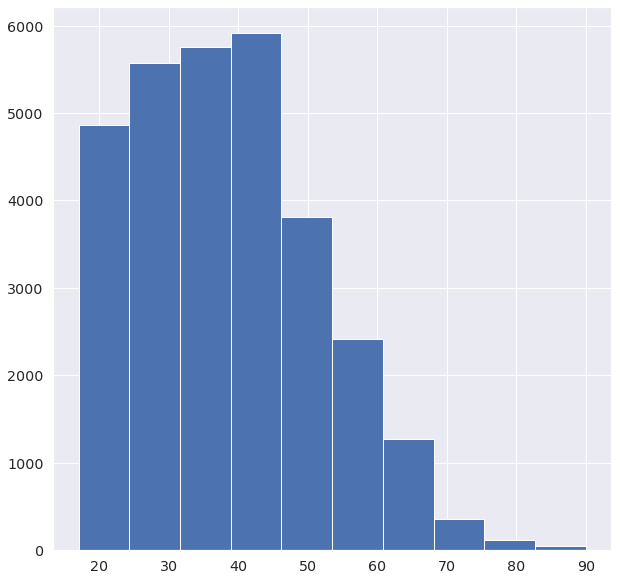

In [38]:
plt.hist(df['age'])
plt.show()

In [39]:
# The most clients between 20 & 50

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


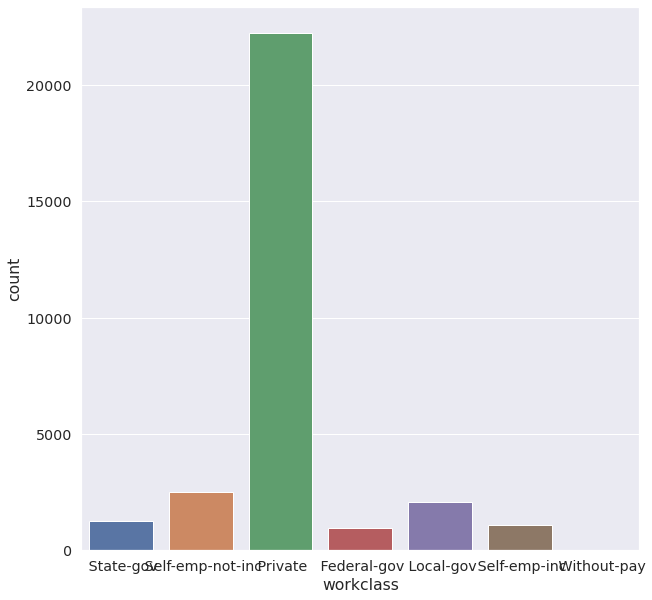

In [40]:
sns.countplot(df['workclass'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


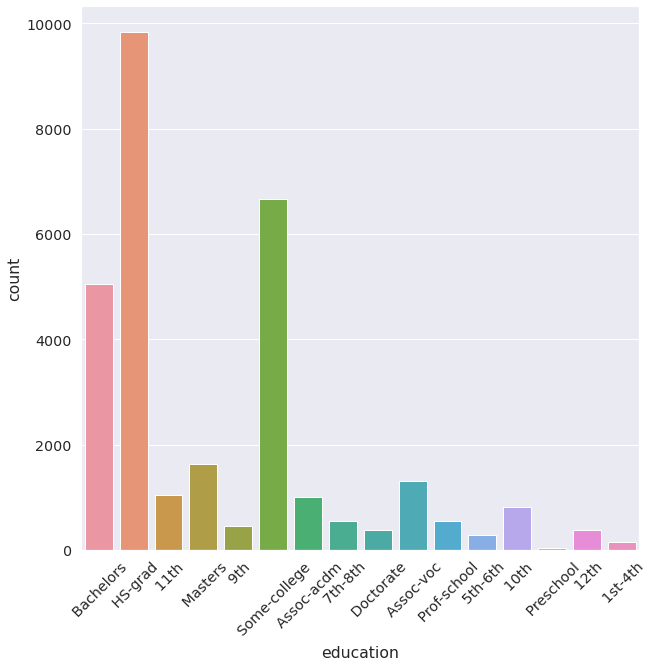

In [41]:
sns.countplot(df['education'])
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


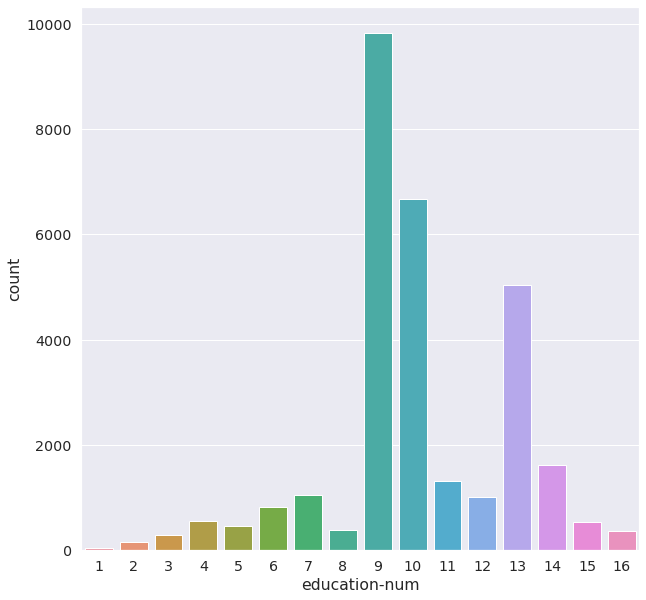

In [42]:
sns.countplot(df['education-num'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


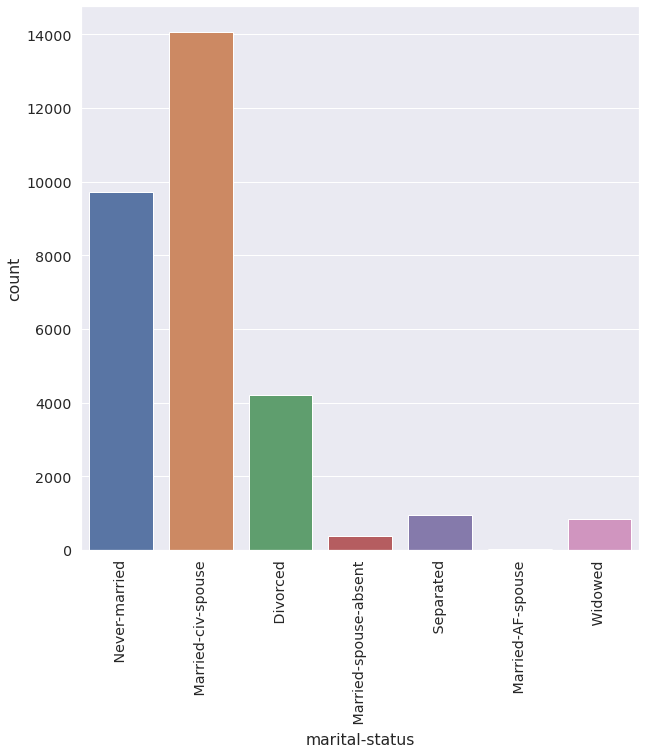

In [43]:
sns.countplot(df['marital-status'])
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


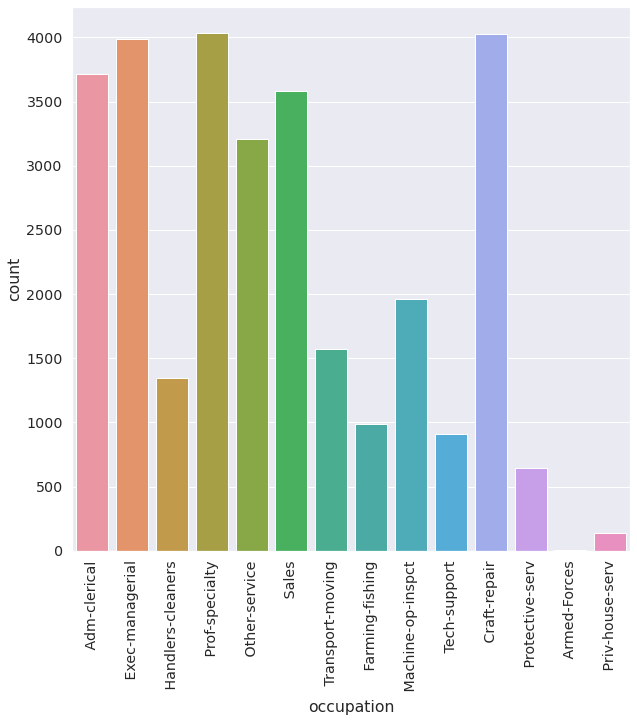

In [44]:
sns.countplot(df['occupation'])
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


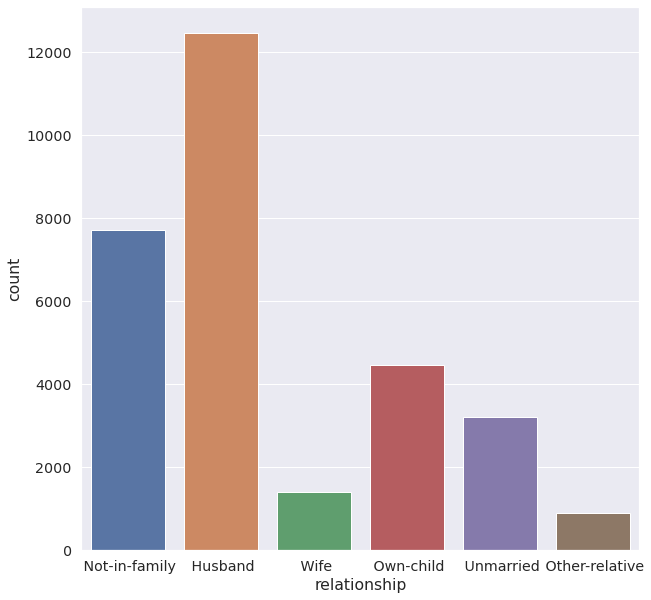

In [45]:
sns.countplot(df['relationship'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


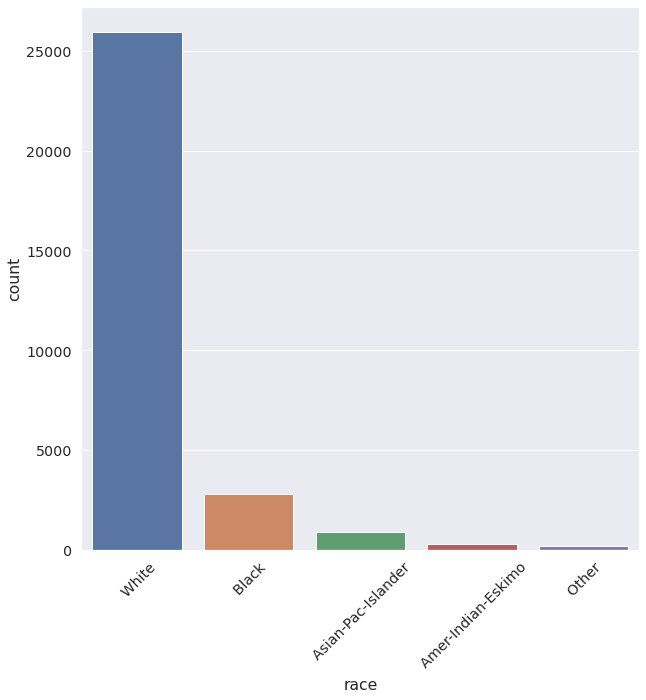

In [46]:
sns.countplot(df['race'])
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


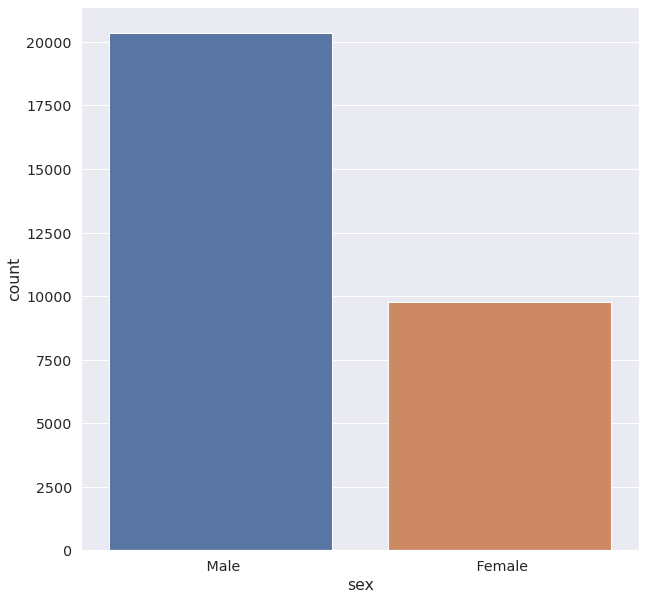

In [47]:
sns.countplot(df['sex'])

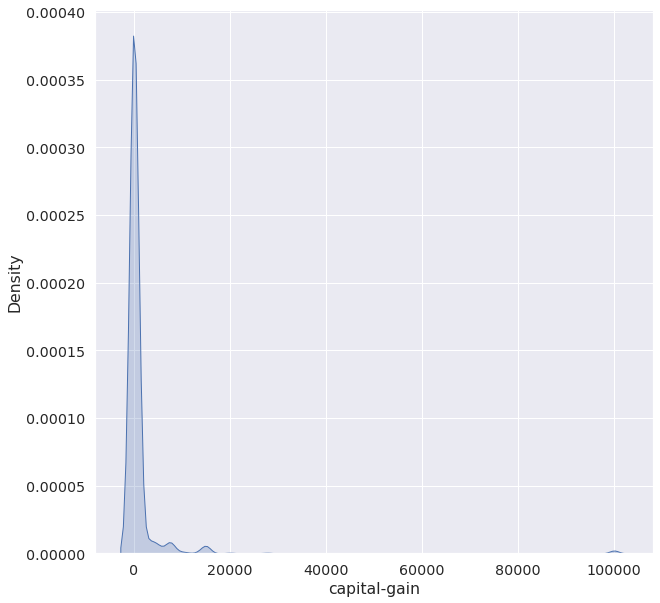

In [48]:
sns.kdeplot(df['capital-gain'],shade=True)

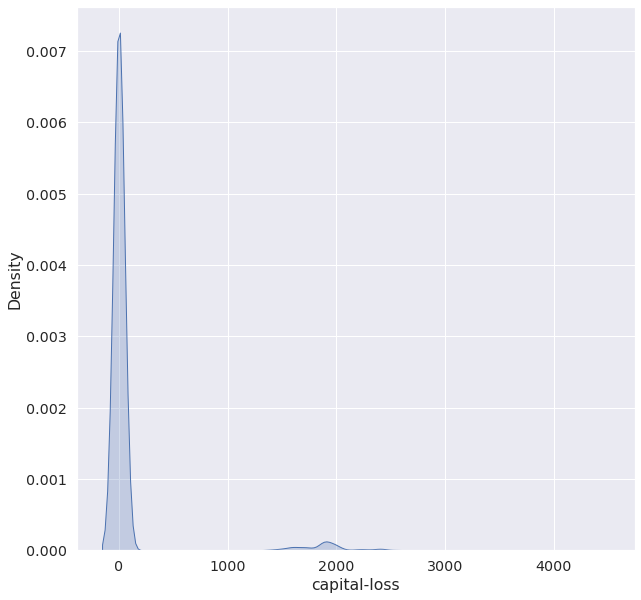

In [49]:
sns.kdeplot(df['capital-loss'],shade=True)

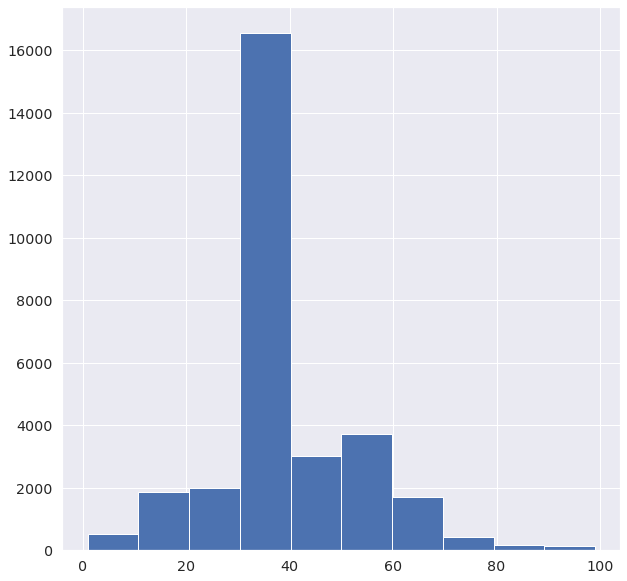

In [50]:
plt.hist(df['hours-per-week'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


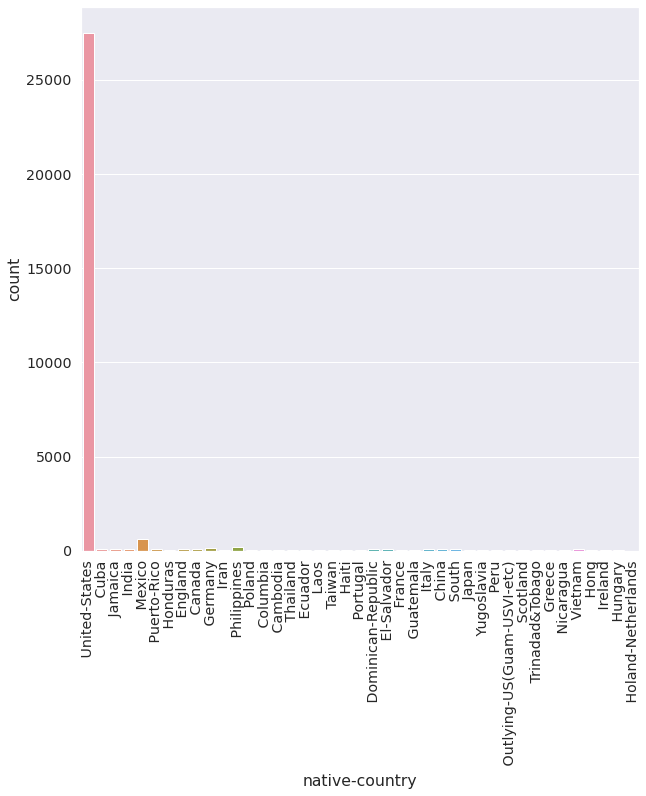

In [51]:
sns.countplot(df['native-country'])
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


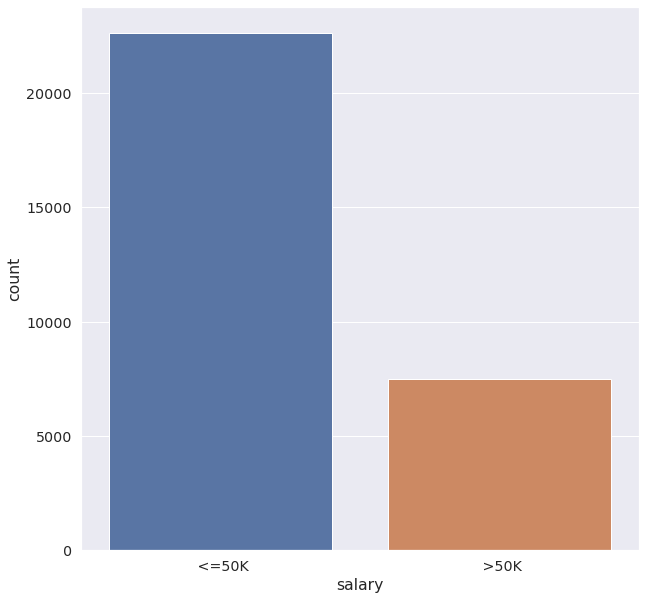

In [52]:
sns.countplot(df['salary'])

## Bivariate

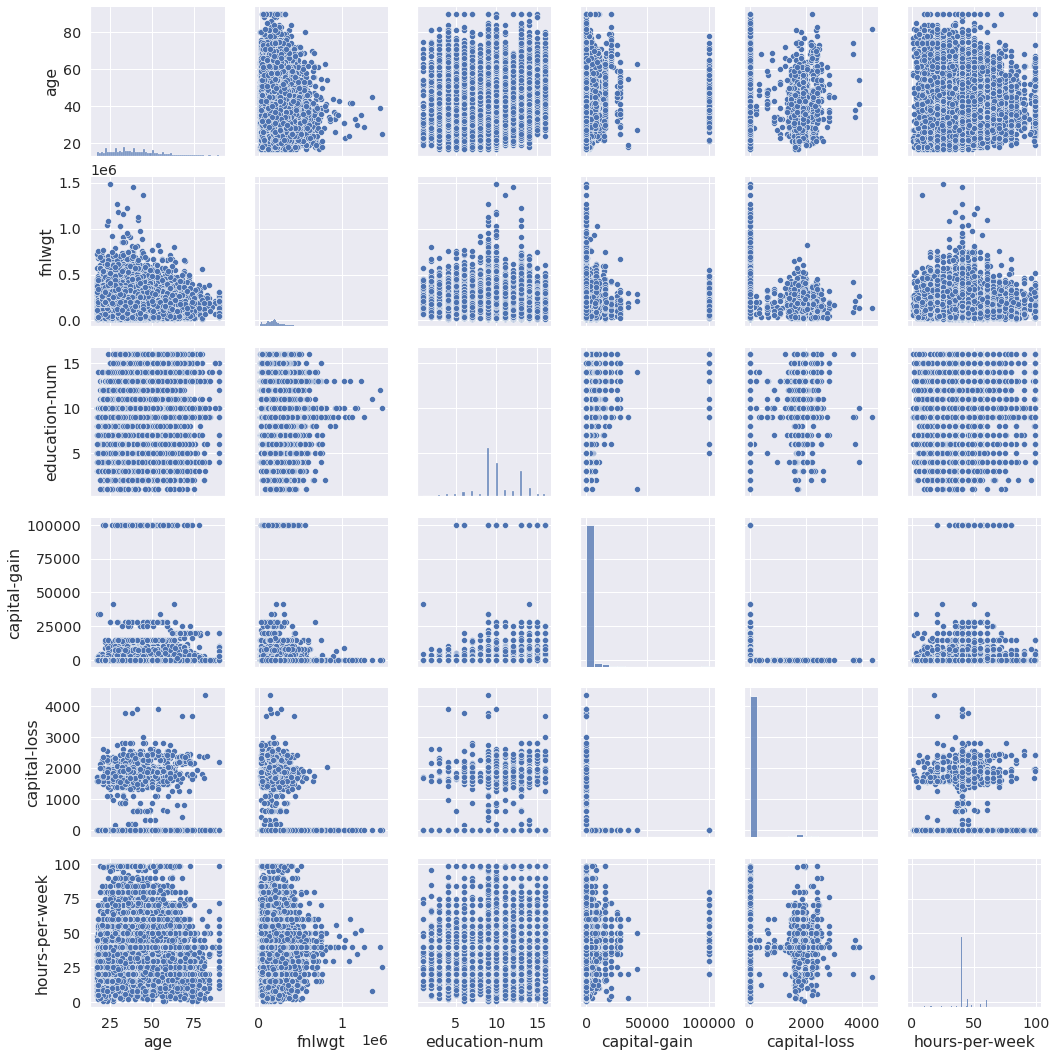

In [53]:
sns.pairplot(df)

In [54]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076279,0.043203,0.080162,0.060141,0.101348
fnlwgt,-0.076279,1.000000,-0.045199,0.000420,-0.009755,-0.023033
education-num,0.043203,-0.045199,1.000000,0.124455,0.079613,0.152842
capital-gain,0.080162,0.000420,0.124455,1.000000,-0.032255,0.080429
capital-loss,0.060141,-0.009755,0.079613,-0.032255,1.000000,0.052380
hours-per-week,0.101348,-0.023033,0.152842,0.080429,0.052380,1.000000


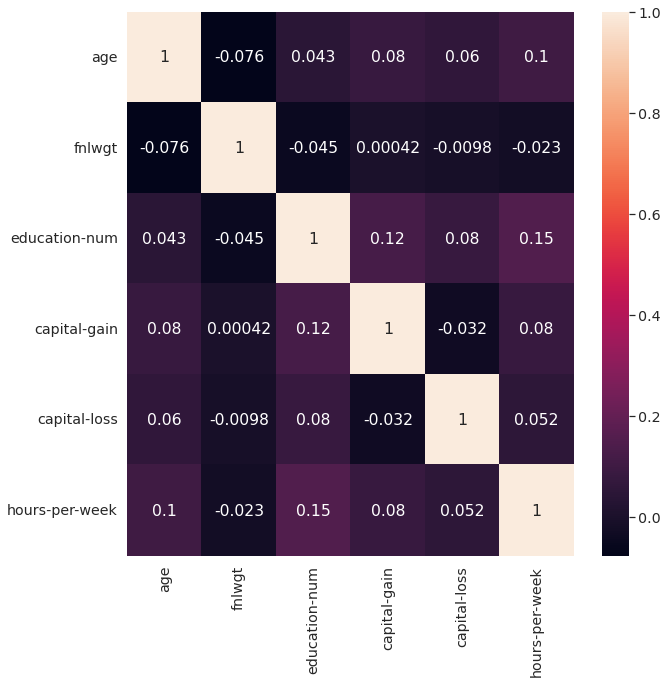

In [55]:
sns.heatmap(df.corr(),annot=True)

In [56]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

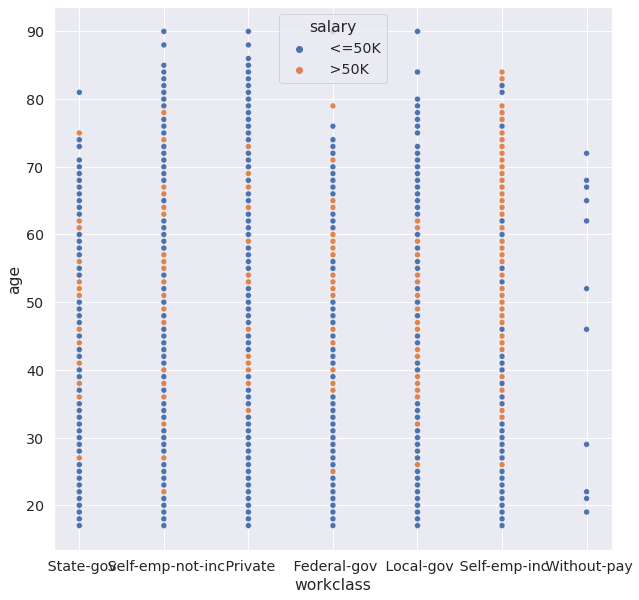

In [57]:
sns.scatterplot(data=df,x='workclass',y='age',hue='salary')

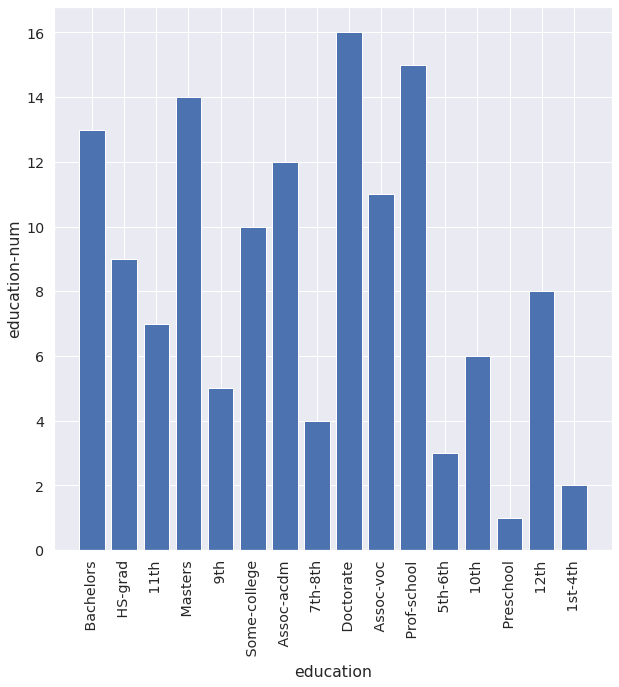

In [58]:
plt.bar(df['education'],df['education-num'])
plt.xlabel('education')
plt.ylabel('education-num')
plt.xticks(rotation=90)
plt.show()

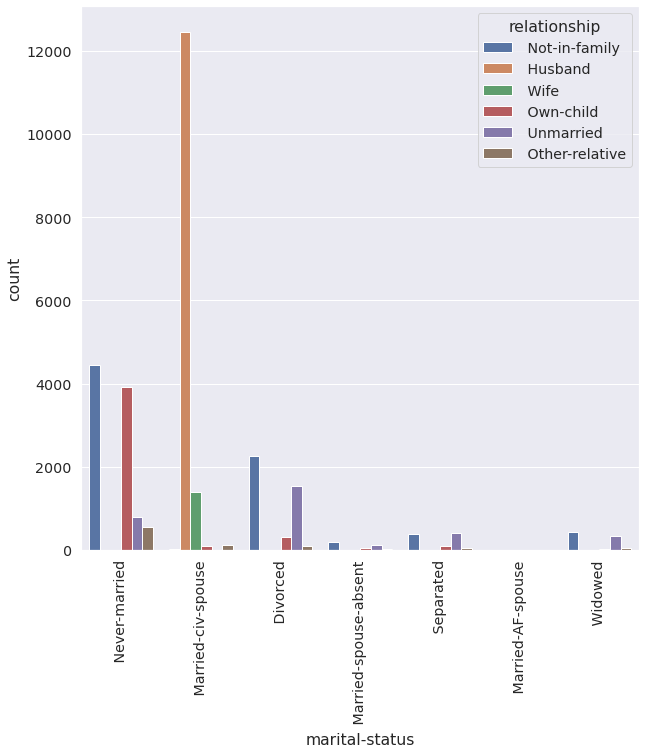

In [59]:
sns.countplot(data=df,x='marital-status',hue='relationship')
plt.xticks(rotation=90)
plt.show()

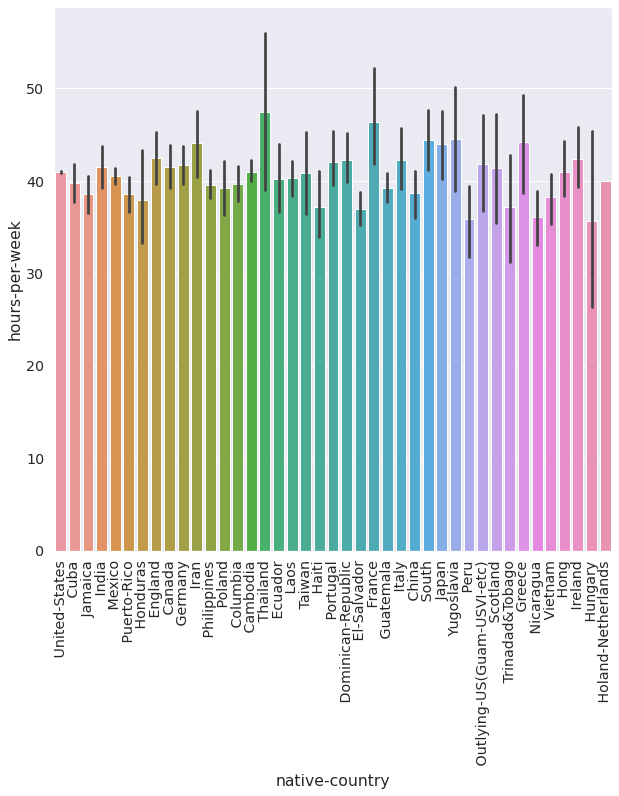

In [60]:
sns.barplot(data=df,x='native-country',y='hours-per-week')
plt.xticks(rotation=90)
plt.show()

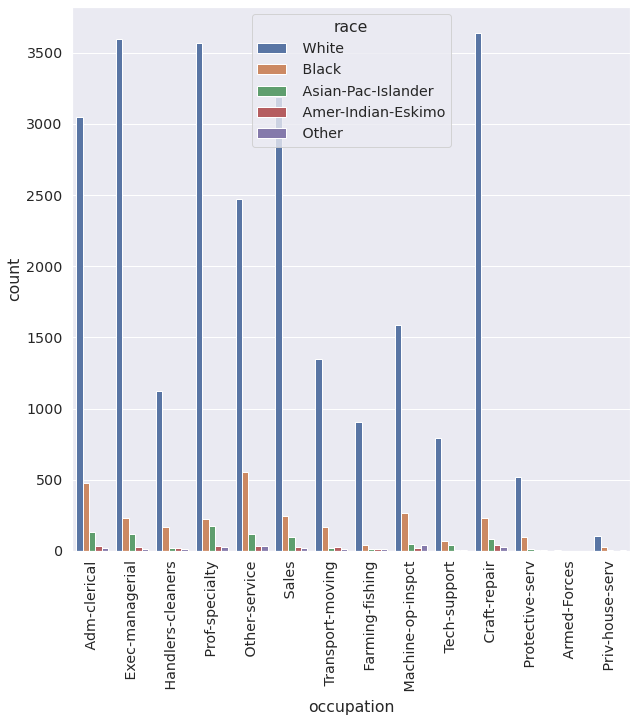

In [61]:
sns.countplot(data=df,x='occupation',hue='race')
plt.xticks(rotation=90)
plt.show()

In [62]:
pd.pivot_table(index='workclass',columns='occupation',values='age',data=df)

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
workclass,,,,,,,,,,,,,,
Federal-gov,42.594937,30.222222,44.396825,44.256983,45.500000,37.636364,39.928571,42.588235,NaN,42.125749,38.703704,40.785714,41.621212,45.958333
Local-gov,40.950178,NaN,42.195804,47.165094,39.275862,37.456522,43.818182,43.846561,NaN,41.468208,38.250000,32.857143,37.078947,44.773913
Private,35.760301,NaN,38.095799,40.041194,35.493304,31.731260,37.546809,33.519159,42.276596,38.956444,40.639785,35.152332,36.630194,39.240577
Self-emp-inc,40.428571,NaN,41.898990,47.607792,44.450980,35.000000,43.500000,40.148148,NaN,46.687898,46.800000,46.669039,44.666667,44.500000
Self-emp-not-inc,40.612245,NaN,41.890805,47.462141,46.937209,37.333333,40.628571,42.641618,NaN,45.021918,36.666667,47.502660,45.807692,43.669492
State-gov,38.055777,NaN,41.890909,43.005376,42.800000,37.555556,39.153846,36.406504,NaN,39.970223,37.775862,41.909091,33.107143,41.878049
Without-pay,60.333333,NaN,21.000000,NaN,43.666667,22.000000,46.000000,72.000000,NaN,NaN,NaN,NaN,NaN,65.000000


In [63]:
pd.pivot_table(index='sex',columns='race',values='capital-gain',data=df)

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
sex,,,,,
Female,605.682243,564.204082,484.871337,223.873563,589.522318
Male,692.932961,1669.233333,723.477064,1566.208333,1385.964496


In [64]:
pd.pivot_table(index='sex',columns='race',values='capital-loss',data=df)

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
sex,,,,,
Female,16.084112,30.363946,42.082916,25.459770,66.493279
Male,49.765363,121.883333,70.311927,65.298611,104.200322


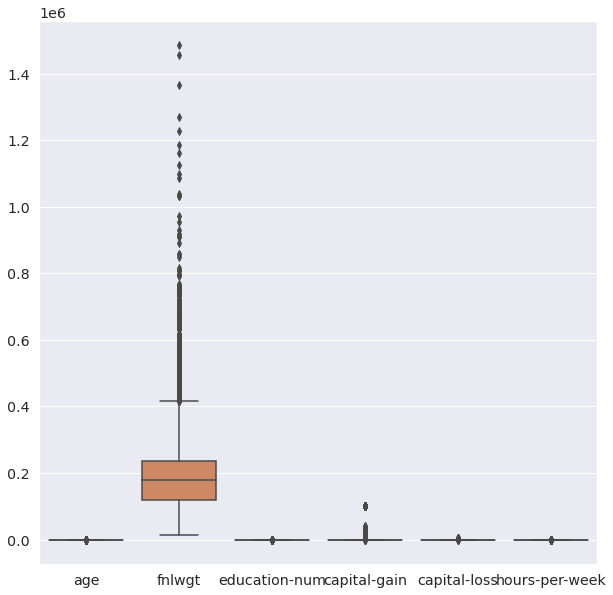

In [65]:
sns.boxplot(data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


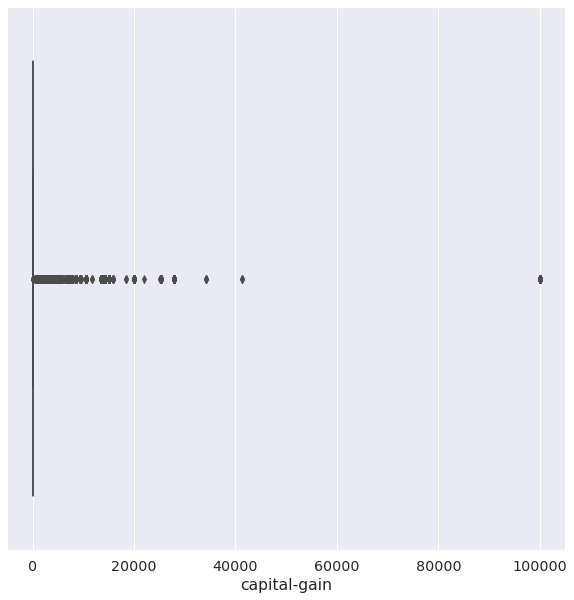

In [66]:
sns.boxplot(df['capital-gain'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


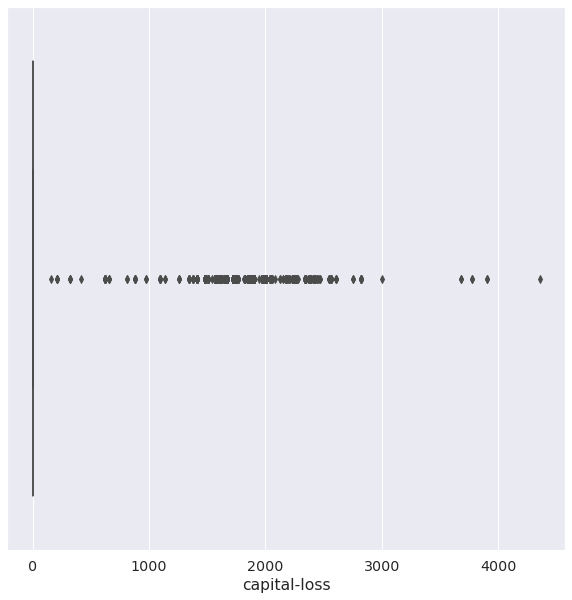

In [67]:
sns.boxplot(df['capital-loss'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


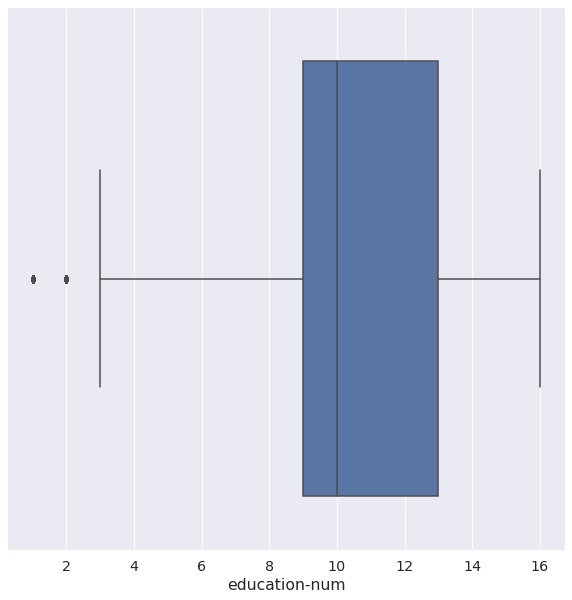

In [68]:
sns.boxplot(df['education-num'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


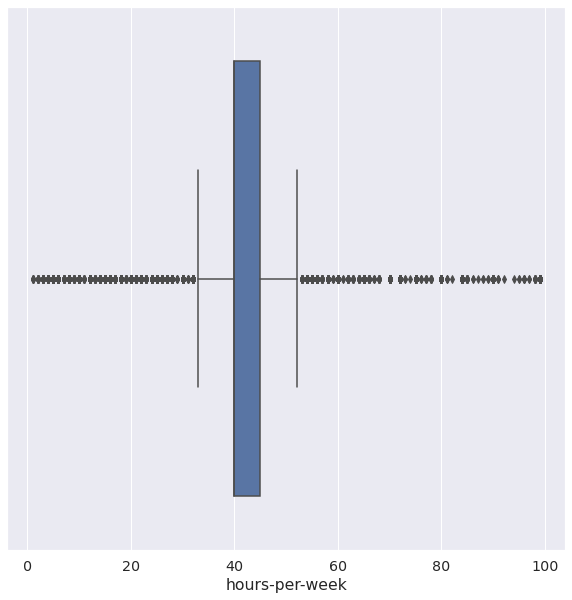

In [69]:
sns.boxplot(df['hours-per-week'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


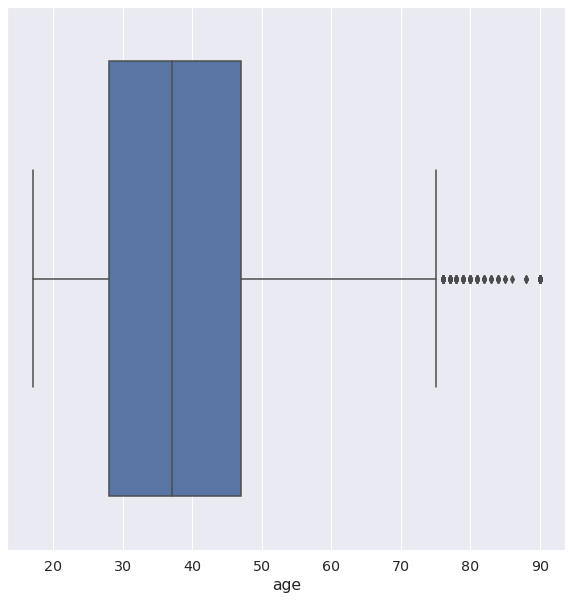

In [70]:
sns.boxplot(df['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


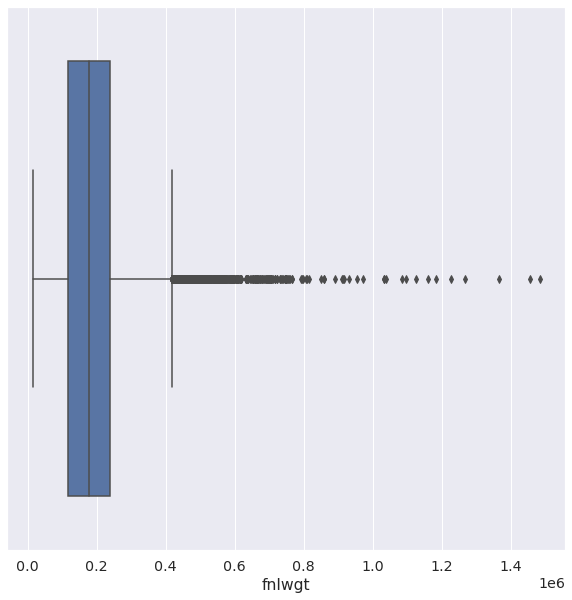

In [71]:
sns.boxplot(df['fnlwgt'])

## Analysis Questions

### 1)	How many employees their country is the United States and their salary <=50k?

In [72]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [73]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [74]:
df[(df['native-country']==' United-States') & (df['salary']==' <=50K')].count()[0]

20494

### 2)How many female and male employees are not married and their salary <=50k?

In [75]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [76]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [77]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [78]:
df[(df['sex']==' Female') & (df['relationship']==' Unmarried') & (df['salary']==' <=50K')].count()[0]

2353

In [79]:
df[(df['sex']==' Male') & (df['relationship']==' Unmarried') & (df['salary']==' <=50K')].count()[0]

645

### 3)	How many male black employees and their salary >50k?

In [80]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [81]:
df[(df['sex']==' Male') & (df['race']==' Black') & (df['salary']==' >50K')].count()[0]

281

### 4)Did male Prof-specialty receive the same salary as female Prof-specialty?

In [82]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [83]:
df[(df['occupation']==' Prof-specialty') & (df['sex']==' Female') & (df['salary']==' >50K')].count()[0]

380

In [84]:
df[(df['occupation']==' Prof-specialty') & (df['sex']==' Male') & (df['salary']==' >50K')].count()[0]

1430

### 5)How much the salary of the employee who worked 92 hours per week?

In [85]:
df[df['hours-per-week']==92]['salary']

19160     <=50K
Name: salary, dtype: object

### 6) What is the informaion about the employee whose native country is Holand-Netherlands?

In [86]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [87]:
df[(df['native-country']==' Holand-Netherlands')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
19609,32,Private,27882,Some-college,10,Never-married,Machine-op-inspct,Other-relative,White,Female,0,2205,40,Holand-Netherlands,<=50K


### 7) What is the informaion about the employee whose capital gain is 25124?

In [88]:
df['capital-gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
        4064,  4386,  7298,  1409,  3674,  1055,  2050,  2176,   594,
       20051,  6849,  4101,  8614,  3411,  2597, 25236,  4650,  2463,
        3103, 10605,  2964,  3325,  2580,  3471,  4865, 99999,  6514,
        1471,  2329,  2105,  2885, 10520,  2202,  2961, 27828,  6767,
        2228,  1506, 13550,  2635,  5556,  4787,  3781,  3137,  3818,
         914,   401,  2829,  2977,  4934,  2062,  2354,  3464,  5455,
       15020,  1424,  3273, 22040,  4416, 10566,  4931,  7430, 34095,
        6497,  3908,   114,  2346,  2907,  1151,  9386,  2414,  2290,
        3418, 15831, 41310,  4508,  2538,  3456,  1848,  3887,  7896,
        5721,  9562,  6418,  1455,  2036,  3942,  1831, 11678,  2936,
        2993,  7443,  6360,  4687,  1797,  6723,  2009,  3432,  6097,
        1639,  2653, 18481, 25124,  7978,   991,  1173,  2387,  5060,
        1086])

In [89]:
df[df['capital-gain']==25124]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
18847,73,Private,183213,Assoc-voc,11,Widowed,Prof-specialty,Not-in-family,White,Male,25124,0,60,United-States,>50K
22462,68,Self-emp-inc,52052,Assoc-voc,11,Widowed,Sales,Not-in-family,White,Female,25124,0,50,United-States,>50K


# Handle outliers

In [10]:
! pip install datasist

In [10]:
from datasist.structdata import detect_outliers

In [11]:
for col in df.columns:
    outliers_indicies = detect_outliers(df,0,['fnlwgt','age','hours-per-week','education-num','capital-loss','capital-gain'])
    df.drop(outliers_indicies,inplace=True)

# Convert categorical to dummy variable

In [12]:
df['salary'] = df['salary'].astype('category')
y = df['salary'].cat.codes
y_names = list(df['salary'].cat.categories)

X = df.drop(columns=['salary'])

In [13]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [14]:
X = pd.get_dummies(X,drop_first=True)

In [15]:
df['salary'].value_counts()

 <=50K    9106
 >50K     2018
Name: salary, dtype: int64

# Split data into train and test

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

# Dealing with imbalance data

In [17]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train_sampled,y_train_sampled = oversample.fit_resample(x_train,y_train)

In [18]:
y_train_sampled.value_counts()

1    7285
0    7285
dtype: int64

# Feature scaling

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_sampled)
x_test_scaled = scaler.transform(x_test)

# Modeling

## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train_sampled)
y_pred_lr = lr.predict(x_test_scaled)
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1821
           1       0.57      0.50      0.53       404

    accuracy                           0.84      2225
   macro avg       0.73      0.71      0.72      2225
weighted avg       0.83      0.84      0.84      2225



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_scaled,y_train_sampled)
y_pred_knn = knn.predict(x_test_scaled)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1821
           1       0.53      0.45      0.49       404

    accuracy                           0.83      2225
   macro avg       0.71      0.68      0.69      2225
weighted avg       0.82      0.83      0.82      2225



## Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_scaled,y_train_sampled)
y_pred_dt = dt.predict(x_test_scaled)
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1821
           1       0.42      0.42      0.42       404

    accuracy                           0.79      2225
   macro avg       0.65      0.65      0.65      2225
weighted avg       0.79      0.79      0.79      2225



## Random Forrest

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_scaled,y_train_sampled)
y_pred_rf = rf.predict(x_test_scaled)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1821
           1       0.52      0.45      0.48       404

    accuracy                           0.83      2225
   macro avg       0.70      0.68      0.69      2225
weighted avg       0.82      0.83      0.82      2225



## Ada Boost

In [24]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()
ad.fit(x_train_scaled,y_train_sampled)
y_pred_ad = ad.predict(x_test_scaled)
print(classification_report(y_test,y_pred_ad))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1821
           1       0.57      0.56      0.56       404

    accuracy                           0.84      2225
   macro avg       0.74      0.73      0.73      2225
weighted avg       0.84      0.84      0.84      2225



## Xg Boost

In [25]:
import xgboost as xg
xg = xg.XGBClassifier()
xg.fit(x_train_scaled,y_train_sampled)
y_pred_xg = xg.predict(x_test_scaled)
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1821
           1       0.57      0.50      0.53       404

    accuracy                           0.84      2225
   macro avg       0.73      0.71      0.72      2225
weighted avg       0.83      0.84      0.84      2225



## SVM

In [26]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(x_train_scaled,y_train_sampled)
y_pred_svm = svm.predict(x_test_scaled)
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1821
           1       0.59      0.48      0.53       404

    accuracy                           0.84      2225
   macro avg       0.74      0.70      0.72      2225
weighted avg       0.83      0.84      0.84      2225



## Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_scaled,y_train_sampled)
y_pred_nb = nb.predict(x_test_scaled)
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.94      0.39      0.56      1821
           1       0.25      0.89      0.39       404

    accuracy                           0.49      2225
   macro avg       0.60      0.64      0.47      2225
weighted avg       0.82      0.49      0.53      2225



### SVM is the best model

# Cross Validation

In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
kfold = KFold(n_splits=3)
scores = cross_validate(svm,x_train_scaled,y_train_sampled,cv = kfold)

In [ ]:
from sklearn.model_selection import GridSearchCV
param = {'C':[1,2,3,4,5],'kernel':['linear','rbf','poly']}
svm = SVC()
grid_search = GridSearchCV(svm,param_grid=param,scoring='accuracy',cv = 3)
grid_search.fit(x_train_scaled,y_train_sampled)

In [32]:
grid_search.best_params_

{'C': 3, 'kernel': 'rbf'}

In [33]:
svm = SVC(C=3,kernel='rbf')
svm.fit(x_train_scaled,y_train_sampled)
y_pred = svm.predict(x_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1821
           1       0.58      0.49      0.53       404

    accuracy                           0.84      2225
   macro avg       0.74      0.71      0.72      2225
weighted avg       0.83      0.84      0.84      2225



In [34]:
df['salary'] = df['salary'].astype('category')
y = df['salary'].cat.codes
y_names = list(df['salary'].cat.categories)

X = df.drop(columns=['salary'])

In [35]:
y_names

[' <=50K', ' >50K']

In [36]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
numeric_column = x_train.select_dtypes(exclude='object').columns

In [38]:
numeric_column

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [39]:
cat_column = x_train.select_dtypes(include='object').columns

In [40]:
cat_column

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11124 entries, 2 to 32558
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             11124 non-null  int64   
 1   workclass       11124 non-null  object  
 2   fnlwgt          11124 non-null  int64   
 3   education       11124 non-null  object  
 4   education-num   11124 non-null  int64   
 5   marital-status  11124 non-null  object  
 6   occupation      11124 non-null  object  
 7   relationship    11124 non-null  object  
 8   race            11124 non-null  object  
 9   sex             11124 non-null  object  
 10  capital-gain    11124 non-null  int64   
 11  capital-loss    11124 non-null  int64   
 12  hours-per-week  11124 non-null  int64   
 13  native-country  11124 non-null  object  
 14  salary          11124 non-null  category
dtypes: category(1), int64(6), object(8)
memory usage: 1.3+ MB


In [42]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
numeric_transformer = Pipeline([('imputer', SimpleImputer(strategy='median')),
                               ('scaler', StandardScaler(with_mean=False))])

In [43]:
cat_transformer = Pipeline([('imputer',SimpleImputer(strategy='most_frequent')),
                            ('onehot',OneHotEncoder()),
                            ('scaler',StandardScaler(with_mean=False))])

In [44]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
     transformers=[
          ('num', numeric_transformer, numeric_column),
          ('cat', cat_transformer, cat_column)])

In [45]:
pipe = Pipeline([('processing',preprocessor),('model',SVC(C=3,kernel='rbf'))])
pipe.fit(x_train,y_train)

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                          

In [46]:
pipe

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                          

In [47]:
import joblib
model_save = joblib.dump(pipe,'model.pkl')

In [48]:
import joblib
model = joblib.load('model.pkl')

In [128]:
df['age'].unique()

array([38, 53, 28, 37, 30, 32, 59, 56, 19, 49, 48, 21, 57, 44, 41, 25, 43,
       35, 36, 31, 23, 27, 40, 52, 46, 34, 20, 29, 42, 47, 39, 61, 70, 33,
       45, 24, 18, 60, 50, 65, 26, 64, 58, 55, 22, 62, 54, 63, 51, 72, 69,
       73, 67, 66, 68, 17, 71])

In [129]:
df['workclass'].unique()

array([' Private', ' State-gov', ' Local-gov', ' Federal-gov',
       ' Self-emp-not-inc', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [130]:
df['fnlwgt'].unique()

array([215646, 234721, 338409, ...,  34066, 321865, 151910])

In [131]:
df['education'].unique()

array([' HS-grad', ' 11th', ' Bachelors', ' Masters', ' Some-college',
       ' Assoc-acdm', ' Assoc-voc', ' 10th', ' 12th'], dtype=object)

In [132]:
df['education-num'].unique()

array([ 9,  7, 13, 14, 10, 12, 11,  6,  8])

In [133]:
df['marital-status'].unique()

array([' Divorced', ' Married-civ-spouse', ' Never-married', ' Separated',
       ' Widowed', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype=object)

In [134]:
df['occupation'].unique()

array([' Handlers-cleaners', ' Prof-specialty', ' Exec-managerial',
       ' Machine-op-inspct', ' Tech-support', ' Craft-repair',
       ' Adm-clerical', ' Other-service', ' Transport-moving', ' Sales',
       ' Protective-serv', ' Farming-fishing', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [135]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Unmarried', ' Own-child',
       ' Other-relative'], dtype=object)

In [136]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Other',
       ' Amer-Indian-Eskimo'], dtype=object)

In [137]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [138]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' India', ' Puerto-Rico', ' Mexico',
       ' England', ' Germany', ' Iran', ' Philippines', ' Cambodia',
       ' Laos', ' Poland', ' Portugal', ' Jamaica', ' Haiti', ' Canada',
       ' Japan', ' Dominican-Republic', ' Italy', ' Peru', ' China',
       ' Trinadad&Tobago', ' El-Salvador', ' Greece', ' Nicaragua',
       ' Guatemala', ' Taiwan', ' Vietnam', ' Hong', ' Ireland', ' South',
       ' Yugoslavia', ' Outlying-US(Guam-USVI-etc)', ' France',
       ' Columbia', ' Honduras', ' Ecuador', ' Scotland', ' Hungary',
       ' Thailand'], dtype=object)

In [49]:
import pandas as pd
model.predict(pd.DataFrame({'age':[17],'workclass':[' Federal-gov'],'fnlwgt':[151910],'education':[' 12th'],'education-num':[9],'marital-status':[' Never-married'],'occupation':[' Armed-Forces'],'relationship':[' Not-in-family'],'race':[' Other'],'sex':[' Female'],'capital-gain':[0],'capital-loss':[0],'hours-per-week':[30],'native-country':[' India']}))

array([0], dtype=int8)

In [50]:
! pip install streamlit

In [51]:
import streamlit

In [52]:
x_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [53]:
%%writefile app.py
import numpy as np
import pandas as pd
import streamlit as st
import joblib

classifier = joblib.load('model.pkl')

def welcome():
    return "Welcome All"

def predict_salary(age, workclass, fnlwgt, education, education_num,marital_status, occupation, relationship, race, sex,capital_gain, capital_loss, hours_per_week, native_country):
    prediction = classifier.predict(pd.DataFrame({'age':[age],'workclass':[workclass],'fnlwgt':[fnlwgt],'education':[education],'education-num':[education_num],'marital-status':[marital_status],'occupation':[occupation],'relationship':[relationship],'race':[race],'sex':[sex],'capital-gain':[capital_gain],'capital-loss':[capital_loss],'hours-per-week':[hours_per_week],'native-country':[native_country]}))
    label = ['< 50 K','> 50 K']
    return label[prediction[0]]

def main():
    st.title("Expected Salary")
    html_temp = """
    <div style="background-color:tomato;padding:10px">
    <h2 style="color:white;text-align:center;">Streamlit Expected salary prediction App </h2>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)
    age = st.text_input("age","Type Here")
    workclass = st.text_input("workclass","Type Here")
    fnlwgt = st.text_input("fnlwgt","Type Here")
    education = st.text_input("education","Type Here")
    education_num = st.text_input("education-num","Type Here")
    marital_status = st.text_input("marital-status","Type Here")
    occupation = st.text_input("occupation","Type Here")
    relationship = st.text_input("relationship","Type Here")
    race = st.text_input("race","Type Here")
    sex = st.text_input("sex","Type Here")
    capital_gain = st.text_input("capital-gain","Type Here")
    capital_loss = st.text_input("capital-loss","Type Here")
    hours_per_week = st.text_input("hours-per-week","Type Here")
    native_country = st.text_input("native-country","Type Here")
    result = ""
    if st.button("predict"):
        result = predict_salary(age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country)
        st.success('The salary is {} USD'.format(result))
    if st.button("About"):
        st.text("our app using streamlit")
        st.text("My Graduation project")
if __name__=='__main__':
    main() 

Overwriting app.py


In [ ]:
! streamlit run app.py